In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from utils.aemepy import fill_avg_per_month, fill_arima_per_month

In [2]:
DF = pd.read_csv('~/CIEMAT/Rn_Weekly_NN/AEMET/Data/Daily/{}'.format('BCN_ZGZ_NVR_HSC_Daily2013-2019.csv'),
                 usecols=['indicativo', 'fecha', 'tmed', 'presMax', 'presMin', 'velmedia'])
DF['presmed'] = DF[['presMax', 'presMin']].mean(axis=1)
DF = DF.drop(['presMax', 'presMin'], axis=1)

BCN = DF[DF['indicativo'] == '0076']
NVR = DF[DF['indicativo'] == '9263D']
ZGZ = DF[DF['indicativo'] == '9434']
HSC = DF[DF['indicativo'] == '9898']

# Cutting by date:
BCN = BCN[(BCN['fecha'] >= '2013-07-07') & (BCN['fecha'] <= '2019-07-21')].sort_values(['fecha'])
NVR = NVR[(NVR['fecha'] >= '2013-07-07') & (NVR['fecha'] <= '2019-07-21')].sort_values(['fecha'])
HSC = HSC[(HSC['fecha'] >= '2013-07-07') & (HSC['fecha'] <= '2019-07-21')].sort_values(['fecha'])
ZGZ = ZGZ[(ZGZ['fecha'] >= '2013-07-07') & (ZGZ['fecha'] <= '2019-07-21')].sort_values(['fecha'])

In [3]:
BCNavg = fill_avg_per_month(BCN)
BCNavg['fecha'] = pd.to_datetime(BCNavg['fecha'])

# Tempeature

In [4]:
fechas_nulls = BCN[BCN['tmed'].isnull()]['fecha']
fechas_nulls

2703   2014-11-07
2705   2014-11-08
2723   2014-11-12
2772   2014-11-25
3262   2015-03-27
3479   2015-05-20
3533   2015-06-03
3635   2015-06-28
5936   2017-01-24
6121   2017-03-11
6400   2017-05-20
7233   2017-12-14
7948   2018-06-11
Name: fecha, dtype: datetime64[ns]

In [5]:
BCNavg.describe()

,tmed,velmedia,presmed
count,2206.000000,2206.000000,2206.000000
mean,17.565093,4.508138,1016.752786
std,5.935671,1.419835,6.708605
min,3.400000,1.400000,990.850000
25%,12.400000,3.600000,1013.200000
50%,17.000000,4.200000,1016.600000
75%,22.800000,5.300000,1020.300000
max,32.100000,13.900000,1038.400000


In [6]:
model = ARIMA(endog=BCNavg['tmed'], order=(3, 0, 1), dates=BCNavg['fecha'], freq='D')
results = model.fit()
print(mean_squared_error(BCNavg['tmed'].values, results.fittedvalues))

2.1269028828253322


/usr/local/lib64/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tavg ($^o C$)')

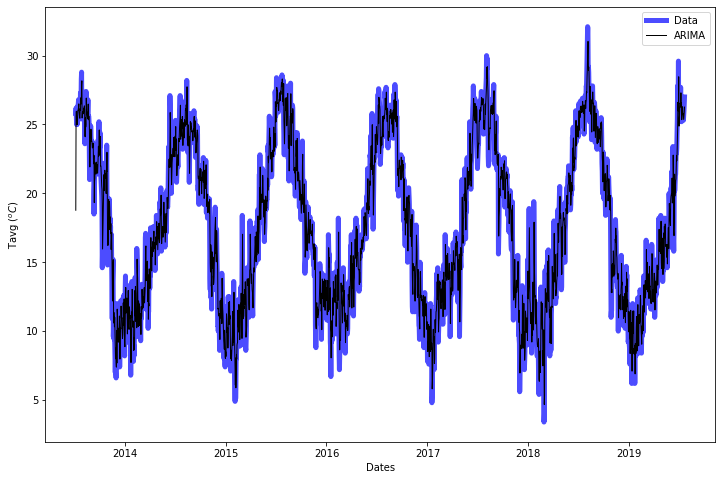

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(BCNavg['fecha'], BCNavg['tmed'], 'b', lw=5, alpha=0.7)
plt.plot(BCNavg['fecha'], results.fittedvalues, 'k-', lw=1)
plt.legend(['Data', 'ARIMA'])
plt.xlabel('Dates')
plt.ylabel('Tavg ($^o C$)')

In [8]:
BCN['ARIMA_t'] = results.fittedvalues
BCN[BCN['tmed'].isnull()]

,indicativo,fecha,tmed,velmedia,presmed,ARIMA_t
2703,0076,2014-11-07,NaN,3.9,1012.35,14.297858
2705,0076,2014-11-08,NaN,NaN,NaN,16.262946
2723,0076,2014-11-12,NaN,NaN,NaN,12.506231
2772,0076,2014-11-25,NaN,NaN,NaN,18.243837
3262,0076,2015-03-27,NaN,3.3,1018.10,11.543219
3479,0076,2015-05-20,NaN,NaN,NaN,18.267057
3533,0076,2015-06-03,NaN,NaN,NaN,20.221750
3635,0076,2015-06-28,NaN,2.8,1018.50,24.352246
5936,0076,2017-01-24,NaN,NaN,NaN,9.621581
6121,0076,2017-03-11,NaN,NaN,NaN,15.504920


In [9]:
BCN['tmed'] = BCN['tmed'].fillna(BCN[BCN['tmed'].isnull()]['ARIMA_t'])
BCN = BCN.drop(['ARIMA_t'], axis=1)

# Preassure

In [10]:
fechas_nulls = BCN[BCN['presmed'].isnull()]['fecha']
fechas_nulls

875    2013-08-07
2307   2014-07-31
2705   2014-11-08
2711   2014-11-09
2715   2014-11-10
2718   2014-11-11
2723   2014-11-12
2772   2014-11-25
3479   2015-05-20
3533   2015-06-03
3631   2015-06-27
5936   2017-01-24
6121   2017-03-11
Name: fecha, dtype: datetime64[ns]

In [11]:
model = ARIMA(endog=BCNavg['presmed'], order=(3, 0, 1), dates=BCNavg['fecha'], freq='D')
results = model.fit()
print(mean_squared_error(BCNavg['presmed'], results.fittedvalues))

9.756468961891832


Text(0, 0.5, 'Pavg ($hPa$)')

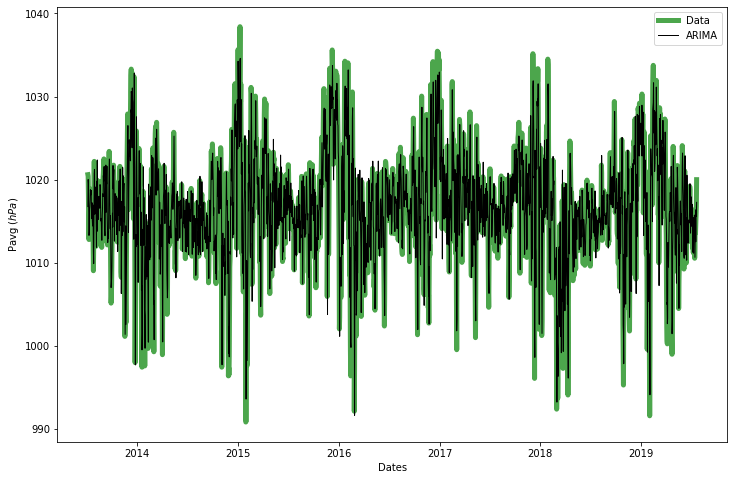

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(BCNavg['fecha'], BCNavg['presmed'], 'g', lw=5, alpha=0.7)
plt.plot(BCNavg['fecha'], results.fittedvalues, 'k-', lw=1)
plt.legend(['Data', 'ARIMA'])
plt.xlabel('Dates')
plt.ylabel('Pavg ($hPa$)')

In [13]:
BCN['ARIMA_p'] = results.fittedvalues
BCN[BCN['presmed'].isnull()]

,indicativo,fecha,tmed,velmedia,presmed,ARIMA_p
875,0076,2013-08-07,26.200000,NaN,NaN,1011.867813
2307,0076,2014-07-31,24.500000,NaN,NaN,1014.110953
2705,0076,2014-11-08,16.262946,NaN,NaN,1013.565275
2711,0076,2014-11-09,12.400000,NaN,NaN,1009.557166
2715,0076,2014-11-10,13.200000,NaN,NaN,1012.059944
2718,0076,2014-11-11,11.600000,NaN,NaN,1010.838182
2723,0076,2014-11-12,12.506231,NaN,NaN,1011.289895
2772,0076,2014-11-25,18.243837,NaN,NaN,1015.328043
3479,0076,2015-05-20,18.267057,NaN,NaN,1013.723398
3533,0076,2015-06-03,20.221750,NaN,NaN,1019.572287


In [14]:
BCN['presmed'] = BCN['presmed'].fillna(BCN[BCN['presmed'].isnull()]['ARIMA_p'])
BCN = BCN.drop(['ARIMA_p'], axis=1)

# Wind velocity

In [15]:
fechas_nulls = BCN[BCN['velmedia'].isnull()]['fecha']
fechas_nulls

875    2013-08-07
2307   2014-07-31
2454   2014-09-06
2705   2014-11-08
2711   2014-11-09
2715   2014-11-10
2718   2014-11-11
2723   2014-11-12
2772   2014-11-25
3479   2015-05-20
3533   2015-06-03
5936   2017-01-24
6121   2017-03-11
8713   2018-12-19
Name: fecha, dtype: datetime64[ns]

In [16]:
model = ARIMA(endog=BCNavg['velmedia'], order=(3, 0, 1), dates=BCNavg['fecha'], freq='D')
results = model.fit()
print(mean_squared_error(BCNavg['velmedia'].values, results.fittedvalues))

1.8690133811772058


Text(0, 0.5, 'Vavg ($km/s$)')

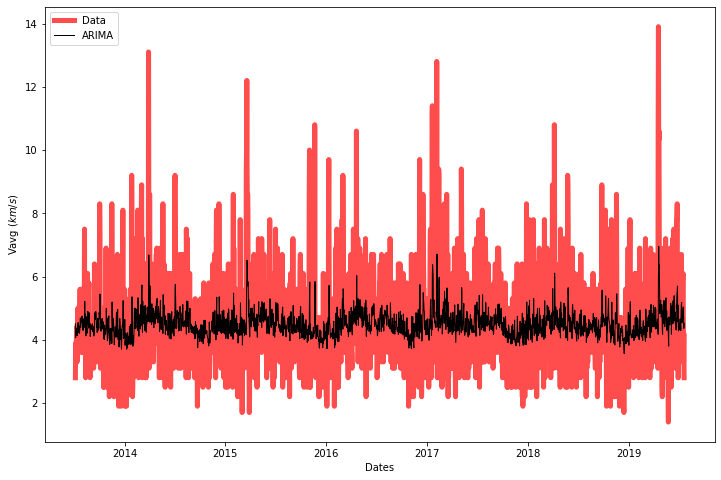

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(BCNavg['fecha'], BCNavg['velmedia'], 'r-', lw=5, alpha=0.7)
plt.plot(BCNavg['fecha'], results.fittedvalues, 'k-', lw=1)
plt.legend(['Data', 'ARIMA'])
plt.xlabel('Dates')
plt.ylabel('Vavg ($km/s$)')

In [18]:
BCN['ARIMA_v'] = results.fittedvalues
BCN[BCN['velmedia'].isnull()]

,indicativo,fecha,tmed,velmedia,presmed,ARIMA_v
875,0076,2013-08-07,26.200000,NaN,1011.867813,4.413231
2307,0076,2014-07-31,24.500000,NaN,1014.110953,5.113713
2454,0076,2014-09-06,24.700000,NaN,1012.300000,4.211672
2705,0076,2014-11-08,16.262946,NaN,1013.565275,4.131001
2711,0076,2014-11-09,12.400000,NaN,1009.557166,4.279538
2715,0076,2014-11-10,13.200000,NaN,1012.059944,4.302042
2718,0076,2014-11-11,11.600000,NaN,1010.838182,4.311371
2723,0076,2014-11-12,12.506231,NaN,1011.289895,4.320263
2772,0076,2014-11-25,18.243837,NaN,1015.328043,4.350832
3479,0076,2015-05-20,18.267057,NaN,1013.723398,4.560144


In [19]:
BCN['velmedia'] = BCN['velmedia'].fillna(BCN[BCN['velmedia'].isnull()]['ARIMA_v'])
BCN = BCN.drop(['ARIMA_v'], axis=1)